#### Training a Neural Network built from scratch using numpy on MNIST dataset .

In [1]:
from tqdm.notebook import trange
from IPython.display import clear_output
from time import perf_counter
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# Pytorch is only used to downlaod the MNIST dataset and transform it into Numpy.array
import torch
import torchvision
from torchvision import transforms

# My NeuralNet implementation
from numpy__neural_net_from_scratch import NeuralNet

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./', download=True, train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./', download=True, train=False, transform=transforms.ToTensor())

x_train = train_dataset.data.float().numpy().reshape(-1, 28 * 28) / 255.  # Normlizedin [0,1]
y_train = train_dataset.targets.float().numpy()  # Keep the labels as numpy vector, just in case
y_train_ohe = torch.nn.functional.one_hot(torch.from_numpy(y_train.astype(np.int64))).numpy()  # OHE y_train labels

x_test = test_dataset.data.float().numpy().reshape(-1, 28 * 28) / 255.  # Normlizedin [0,1]
y_test = test_dataset.targets.float().numpy()

__________

### Batch Gradient Descent 
##### (Update after processing all data points in the dataset)

In [4]:
model = NeuralNet(input_layer=28 * 28, hidden_layers=[50, 20], output_layer=10)

In [5]:
max_steps = 500
lr = 0.1
train_acc = []
test_acc = []

start = perf_counter()
for step in (t := trange(max_steps, ncols=700)):
    output = model.forward(x_train)
    model.backward(y_train_ohe)
    model.step(lr=lr)
    y_predicted = np.argmax(output, axis=1)

    train_accuracy = model.accuracy(y_predicted, np.argmax(y_train_ohe, axis=1))
    train_acc.append(train_accuracy)
    test_accuracy = model.accuracy(np.argmax(model.forward(x_test), axis=1), y_test)
    test_acc.append(test_accuracy)

    t.set_description(f'Step {step + 1}/{max_steps} - Train acc: {train_accuracy * 100:.2f}% | Test acc: {test_accuracy * 100:.2f}%')

end = perf_counter()
print(f'Elapsed time: {end - start:.2f} sec(s)')
bgd = (train_acc, test_acc)

  0%|                                                                                                         …

Elapsed time: 3723.18 sec(s)


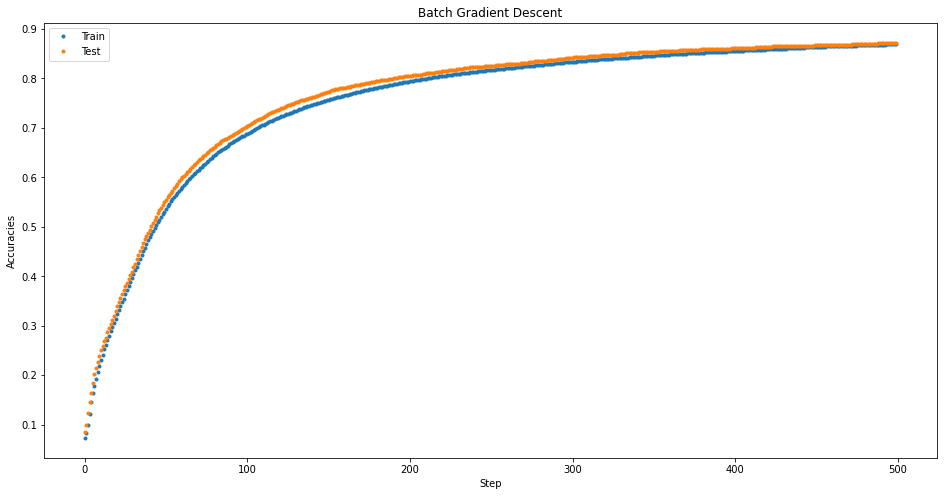

In [6]:
model.plot_acc(train_acc, test_acc, size=(10, 8), title='Batch Gradient Descent')

__________

### Minibatch Gradient Descent 
##### (Update after processing a batch)

In [11]:
model = NeuralNet(input_layer=28 * 28, hidden_layers=[50, 20], output_layer=10)

In [12]:
max_steps = 500
lr = 0.1
mini_batch_size = 2000
train_acc = []
test_acc = []

start = perf_counter()
for step in (t := trange(max_steps, ncols=700)):
    sampled_indices = np.random.randint(0, x_train.shape[0], mini_batch_size)

    output = model.forward(x_train[sampled_indices])
    model.backward(y_train_ohe[sampled_indices])
    model.step(lr=lr)
    y_predicted = np.argmax(output, axis=1)

    train_accuracy = model.accuracy(y_predicted, np.argmax(y_train_ohe[sampled_indices], axis=1))
    train_acc.append(train_accuracy)
    test_accuracy = model.accuracy(np.argmax(model.forward(x_test), axis=1), y_test)
    test_acc.append(test_accuracy)

    t.set_description(f'Step {step + 1}/{max_steps} - Train acc: {train_accuracy * 100:.2f}% | Test acc: {test_accuracy * 100:.2f}%')

end = perf_counter()
print(f'Elapsed time: {end - start:.2f} sec(s)')
mgd = (train_acc, test_acc)

  0%|                                                                                                         …

Elapsed time: 533.36 sec(s)


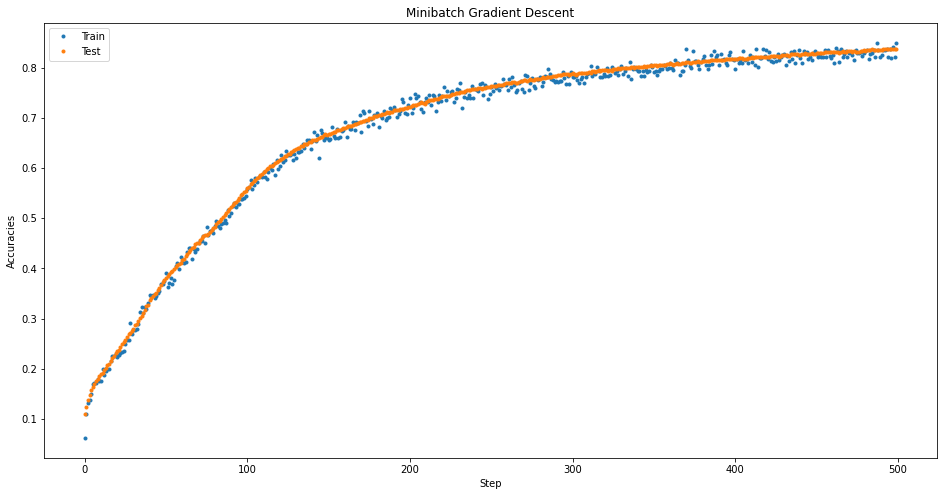

In [13]:
model.plot_acc(train_acc, test_acc, size=(10, 8), title='Minibatch Gradient Descent')

__________

### Stochastic Gradient Descent 
##### (Update after processing a single data point)

In [14]:
model = NeuralNet(input_layer=28 * 28, hidden_layers=[50, 20], output_layer=10)

In [20]:
max_steps = 1000
lr = 0.05
train_acc = []
test_acc = []

start = perf_counter()
for step in (t := trange(max_steps, ncols=700)):
    sampled_index = np.random.randint(0, x_train.shape[0], 1)

    output = model.forward(x_train[sampled_index])
    model.backward(y_train_ohe[sampled_index])
    model.step(lr=lr)
    y_predicted = np.argmax(output, axis=1)

    train_accuracy = model.accuracy(y_predicted, np.argmax(y_train_ohe[sampled_index], axis=1))
    train_acc.append(train_accuracy)
    test_accuracy = model.accuracy(np.argmax(model.forward(x_test), axis=1), y_test)
    test_acc.append(test_accuracy)

    t.set_description(f'Step {step + 1}/{max_steps} - Train acc: {train_accuracy * 100:.2f}% | Test acc: {test_accuracy * 100:.2f}%')
end = perf_counter()
print(f'Elapsed time: {end - start:.2f} sec(s)')
sgd = (train_acc, test_acc)

  0%|                                                                                                         …

Elapsed time: 771.79 sec(s)


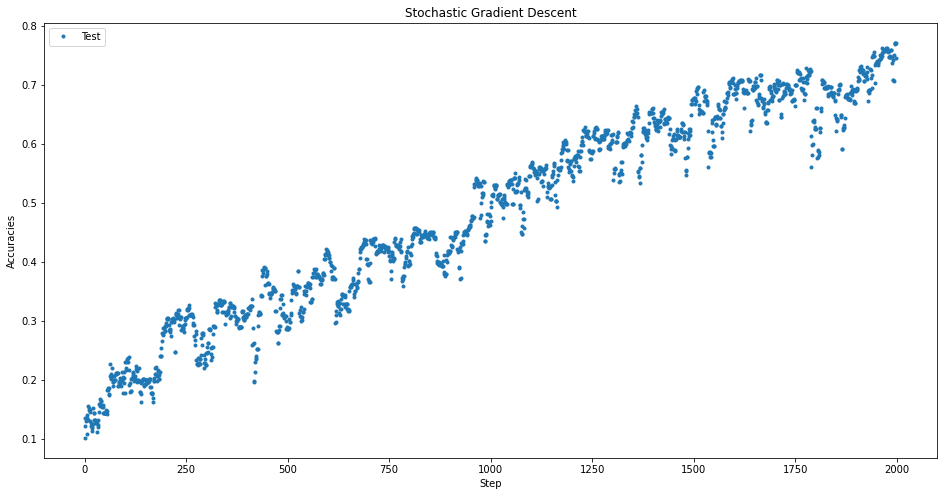

In [21]:
model.plot_acc(None, test_acc, size=(10, 8), title='Stochastic Gradient Descent')